
# 项目：未前往就诊的挂号预约数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集[(Medical Appointment No Shows)](https://www.kaggle.com/joniarroba/noshowappointments) 来自包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 

(ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa 

Família 的保障人群；请注意最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [2]:
#读取数据
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


数据存在`handicap`和`hypertension`列名拼写错误

In [3]:
#查看基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#查看基本信息
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


该数据未发现缺失值,发现`Age`列存在无效值





### 数据清理

In [5]:
#更改数据类型
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


将日期列切换为datetime类型

In [6]:
#修正单词名称拼写错误
df.rename(columns = {'Hipertension':'Hypertension'},inplace = True)
df.rename(columns = {'Handcap':'Handicap'},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


修正列名称拼写错误

In [7]:
#去重未发现重复值
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


没有重复值

去除无效值

In [8]:
df = df[df['Age']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106987 non-null float64
AppointmentID     106987 non-null int64
Gender            106987 non-null object
ScheduledDay      106987 non-null datetime64[ns]
AppointmentDay    106987 non-null datetime64[ns]
Age               106987 non-null int64
Neighbourhood     106987 non-null object
Scholarship       106987 non-null int64
Hypertension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handicap          106987 non-null int64
SMS_received      106987 non-null int64
No-show           106987 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.2+ MB


<a id='eda'></a>
## 探索性数据分析



### 决定客户是否完成预约的重要因素有哪些?

患者年龄是否为觉得履行预约的因素?

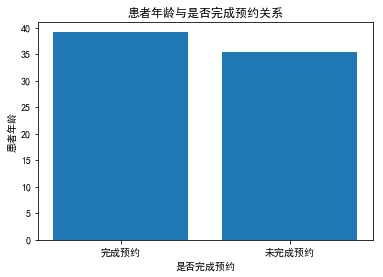

In [9]:
#没有取消预约的人岁数较小
age_mean = df.groupby(['No-show'])['Age'].mean()
locations = [1,2]
labels = ['完成预约','未完成预约']
plt.bar(locations,age_mean,tick_label = labels)
plt.title('患者年龄与是否完成预约关系')
plt.xlabel('是否完成预约')
plt.ylabel('患者年龄');

完成预约的人年龄偏大

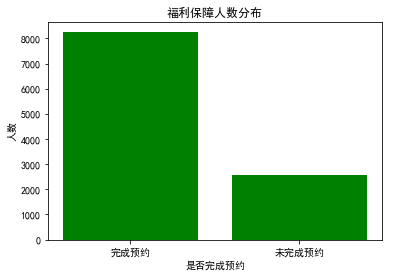

In [10]:
#预约人数是否有医保
scholarship = df.groupby(['No-show'])['Scholarship'].sum()
locations = [1,2]
labels = ['完成预约','未完成预约']
plt.bar(locations,scholarship,color = 'g',tick_label = labels)
plt.title('福利保障人数分布')
plt.xlabel('是否完成预约')
plt.ylabel('人数');

多数享有福利保障的病人会来预约

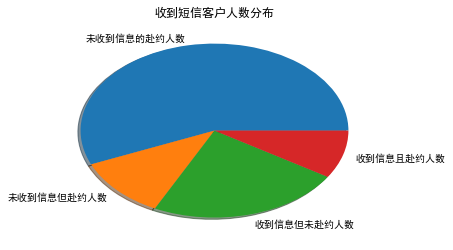

In [11]:
#按是否收到信息与是否赴约组合数据,统计人数
x = df.groupby(['SMS_received','No-show'])['Age'].count()
#绘图 
labels = ['未收到信息的赴约人数','未收到信息但赴约人数','收到信息但未赴约人数','收到信息且赴约人数']
plt.pie(x,labels = labels,shadow=True)
plt.title('收到短信客户人数分布');

未收到信息的赴约人数更多

### 哪一天的预约人数最多?

In [12]:
#穿件预约日期的月与天列
df['A_month'] = df['AppointmentDay'].dt.month
df['Appoint_dayk'] = df['AppointmentDay'].dt.weekday_name

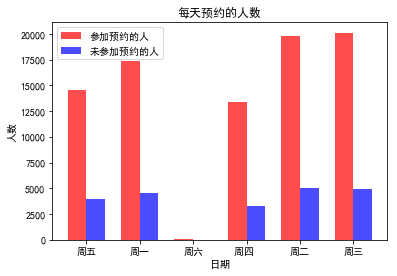

In [13]:
df_yes = df[df['No-show'] == 'Yes']
df_no = df[df['No-show']=='No']
ind = np.arange(6)
width = 0.35
no = df_no.groupby('Appoint_dayk')['No-show'].value_counts()
yes = df_yes.groupby('Appoint_dayk')['No-show'].value_counts()
red_bars = plt.bar(ind, no, width, color='r', alpha=.7, label='参加预约的人')
blue_bars = plt.bar(ind+width, yes, width, color='b', alpha=.7, label='未参加预约的人')
plt.ylabel('人数')
plt.xlabel('日期')
plt.title('每天预约的人数')
locations = ind + width / 2  # x 坐标刻度位置
labels =['周五','周一','周六','周四 ','周二','周三'  ]   # x 坐标刻度标签
plt.xticks(locations, labels);
plt.legend();

周三周四是医院预约人数最多的

<a id='conclusions'></a>
## 结论



决定客户是否完成预约的重要因素有:

1. 是否享有福利保障
2. 是否收到回馈短信

一周的哪几天预约人数较多:

1. 周二、周三的预约人数较多

#### 局限性

* 因异常值远小于数据值总量,所以去掉异常值不会导致严重偏差

* 数据集缺乏`Neighbourhood`的详细描述(距离、位置等),无法做出具体分析

* 数据集中的疾病列(`Hypertension`到`Handicap`列)缺乏详细描述

* 本项目只探索了特征之间的相互关系，并没有他们之间的因果关系